In [1]:
import BenchmarkTools: @btime, @benchmark;

import Pkg: activate, build
activate("../GSHEIntegrator/.")
import GSHEIntegrator;


import Plots
using LaTeXStrings
using Measures
using NPZ

  Activating project at `~/Projects/birefringence/GSHEIntegrator`
┌ Info: Precompiling GSHEIntegrator [95376d2f-314f-47c4-97a6-da6eee6a3a26]
└ @ Base loading.jl:1423


In [40]:
runID = "01"
cdir = "/Users/richard/Projects/birefringence/data/"
msg = "Varying the θ observer"
Nsols = 2
to_save = false

ϵs = (10).^LinRange(-3, -1, 20)
rsource = 4.0
θsource = 0.5π
ϕsource = 0.0

robs = 100.0
θobs = acos.(LinRange(-0.995, 0.995, 24))
push!(θobs, π/2)
sort!(θobs)
# θobs = LinRange(0.85π, 0.98π, 6)
ϕobs = 1π

as = 0.99

opt_options = GSHEIntegrator.OptimiserOptions(Ninit=50)
ode_options = GSHEIntegrator.ODESolverOptions(no_loops=true)

geometries = GSHEIntegrator.setup_geometries(;
   rsource=rsource, θsource=θsource, ϕsource=ϕsource,
   robs=robs, θobs=θobs, ϕobs=ϕobs, a=as,
   opt_options=opt_options, ode_options=ode_options);
Nconfs = length(geometries)
println(Nconfs)

if to_save
   GSHEIntegrator.save_geometry_info(cdir, runID, geometries[1], msg)
   npzwrite(joinpath(cdir, "$(runID)_Epsilons.npy"), ϵs)
   npzwrite(joinpath(cdir, "$(runID)_VaryParam.npy"), θobs)
end

25


In [45]:
Xgeos, Xgshes = GSHEIntegrator.solve_full(geometries, ϵs, true, 2; perturbation_verbose=false);

Solving GSHE for geometry 21/25
Solving GSHE for geometry 4/25
Solving GSHE for geometry 23/25
Solving GSHE for geometry 19/25
Solving GSHE for geometry 1/25
Solving GSHE for geometry 8/25
Solving GSHE for geometry 13/25
Solving GSHE for geometry 10/25
Solving GSHE for geometry 11/25
Solving GSHE for geometry 7/25
Solving GSHE for geometry 18/25
Solving GSHE for geometry 16/25
Solving GSHE for geometry 17/25
Solving GSHE for geometry 14/25
Solving GSHE for geometry 9/25
Solving GSHE for geometry 24/25
Solving GSHE for geometry 12/25
Solving GSHE for geometry 20/25
Solving GSHE for geometry 5/25
Solving GSHE for geometry 3/25
Solving GSHE for geometry 6/25
Solving GSHE for geometry 25/25
Solving GSHE for geometry 15/25
Solving GSHE for geometry 22/25
Solving GSHE for geometry 2/25


In [31]:
# Xgshes = GSHEIntegrator.solve_increasing(Xgeos, geometries, ϵs, true, false);

if to_save
    npzwrite(joinpath(cdir, "$(runID)_Xgeos.npy"), Xgeos)
    npzwrite(joinpath(cdir, "$(runID)_Xgshes.npy"), Xgshes)
end

In [47]:
αs, βs = GSHEIntegrator.fit_timing(ϵs, Xgeos, Xgshes, geometries; fit_gshe_gshe=true)

if to_save
    npzwrite(joinpath(cdir, "$(runID)_alphas.npy"), αs)
    npzwrite(joinpath(cdir, "$(runID)_betas.npy"), βs)
end

┌ Info: 20 element(s) x=[0.001, 0.0012742749857031334, 0.0016237767391887226, 0.00206913808111479, 0.002636650898730361, 0.003359818286283781, 0.004281332398719391, 0.00545559478116852, 0.0069519279617756054, 0.008858667904100823, 0.011288378916846895, 0.01438449888287663, 0.018329807108324356, 0.023357214690901226, 0.029763514416313176, 0.0379269019073225, 0.04832930238571752, 0.06158482110660264, 0.07847599703514611, 0.1] y=[3.268496584496461e-13, 4.689582056016661e-13, 2.842170943040401e-14, 1.4210854715202004e-13, 7.105427357601002e-14, 4.263256414560601e-14, 4.263256414560601e-14, 0.0, 1.2789769243681803e-13, 1.4210854715202004e-14, 7.105427357601002e-14, 2.2737367544323206e-13, 1.2789769243681803e-13, 2.1316282072803006e-13, 8.526512829121202e-14, 8.526512829121202e-14, 2.5579538487363607e-13, 2.842170943040401e-14, 1.7053025658242404e-13, 9.947598300641403e-14] below integration error 1.0e-12. Removing.
└ @ GSHEIntegrator /Users/richard/Projects/birefringence/GSHEIntegrator/src/

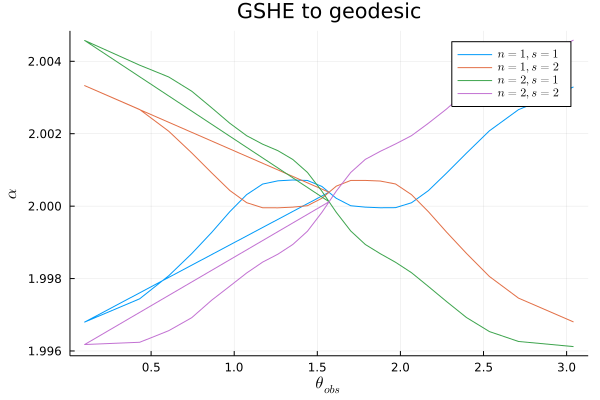

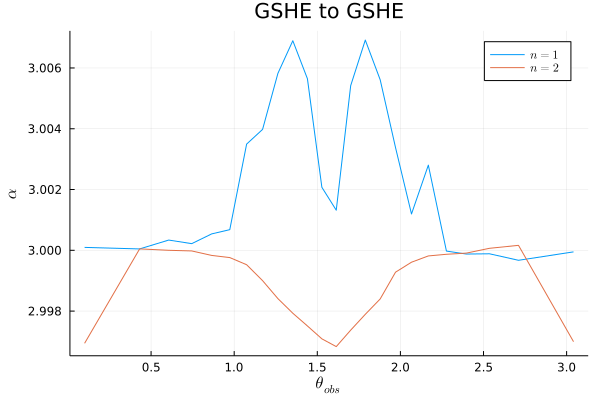

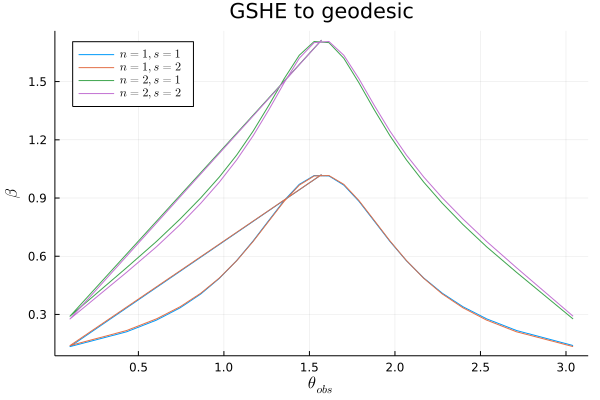

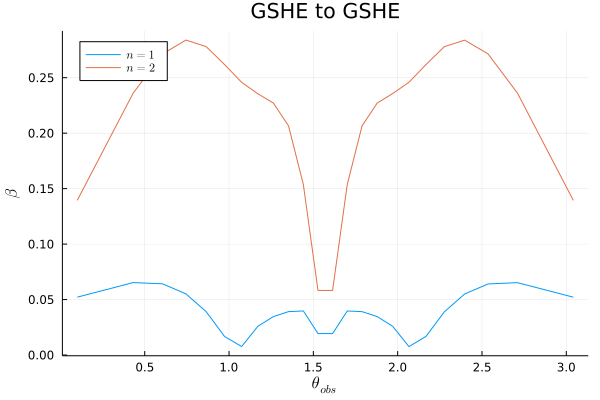

In [49]:
fig = Plots.plot(xlabel=L"\theta_{\rm obs}", ylabel=L"\alpha", legend=:best, dpi=300, title="GSHE to geodesic")

for i in 1:Nsols, s in 1:2
    sx = s == 1 ? 2 : -2
    Plots.plot!(fig, θobs, αs[:, i, s, 1], label=L"n = %$i, s = %$s")
end

display(fig)


fig = Plots.plot(xlabel=L"\theta_{\rm obs}", ylabel=L"\alpha", legend=:best, dpi=300, title="GSHE to GSHE")
for i in 1:Nsols
    Plots.plot!(fig, θobs, αs[:, i, 3, 1], label=L"n = %$i")
end

display(fig)



fig = Plots.plot(xlabel=L"\theta_{\rm obs}", ylabel=L"\beta", legend=:topleft, dpi=300,
                 title="GSHE to geodesic")
for i in 1:Nsols, s in 1:2
    sx = s == 1 ? 2 : -2
    Plots.plot!(fig, θobs, βs[:, i, s, 1], label=L"n = %$i, s = %$s")
end
Plots.savefig(fig, "~/Downloads/gshe_geodesic_betas.png")
display(fig)


fig = Plots.plot(xlabel=L"\theta_{\rm obs}", ylabel=L"\beta", legend=:topleft, dpi=300,
                 title="GSHE to GSHE")
for i in 1:Nsols
    Plots.plot!(fig, θobs, βs[:, i, 3, 1], label=L"n = %$i")
end

Plots.savefig(fig, "~/Downloads/gshe_gshe_betas.png")
display(fig)